In [6]:
import interactive_cx_list_optimizer
import cx_list_from_stabilizers_in_sequence
import draw_ordered_tanner_graph
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
code = cx_list_from_stabilizers_in_sequence.RotatedSurfaceCode(L=5)

cx_list = code.generate_cx_list()
ancilla_type, data_mapping, ancilla_mapping = code.build_mappings()
lz = code.lz
lx = code.lx
data_coords = code.data_coords
ancilla_coords = code.ancilla_coords

In [8]:
from permute_within_each_stabilizer import random_permutation_within_each_stabilizer
random_permutation_within_each_stabilizer(cx_list)

In [9]:
optimizer = interactive_cx_list_optimizer.InteractiveCxListOptimizer(
    initial_cx_list=cx_list,
    ancilla_type=ancilla_type,
    data_mapping=data_mapping,
    ancilla_mapping=ancilla_mapping,
    lz=lz,
    lx=lx,
    experiment_type="both",
    p_cx=0.01,
    p_idle=0,
    cycles_with_noise=5,
)

In [10]:
optimizer.run_optimization(max_bp_iterations=1000,
                           osd_order=5,
                           iterations=200,
                           max_num_shots=10_000,
                           max_num_errors=100,
                           flags=True,
                           draw=True,
                           step_type='single_stabilizer')

KeyError: 'X0'

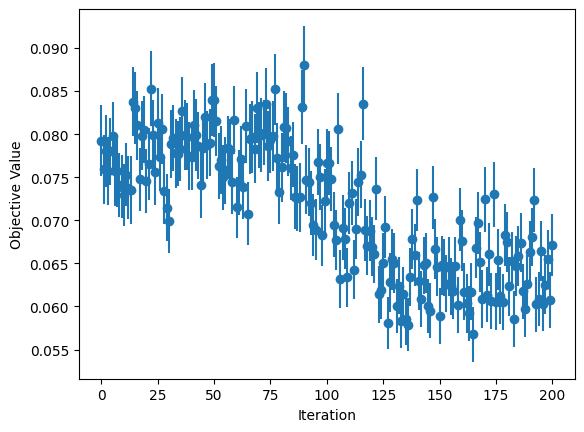

In [6]:
optimizer.plot_history()

/Users/giladkishony/PycharmProjects/ldpc_optimization/shuffle_all_cxs/draw_ordered_tanner_graph.py:106: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, connectionstyle="arc3, rad=0.1")


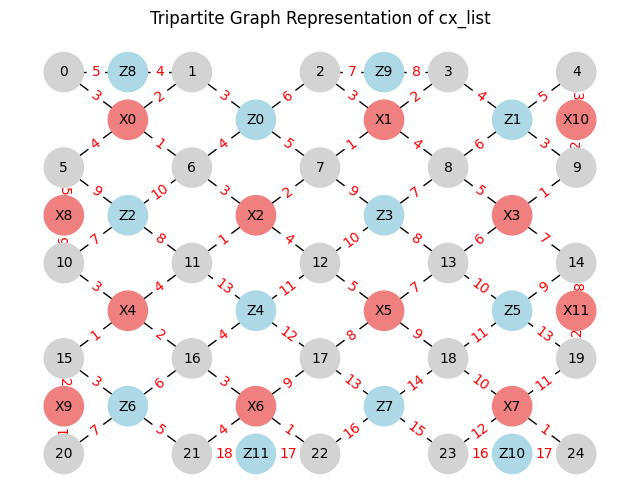

In [14]:
draw_ordered_tanner_graph.draw_cx_list(optimizer.optimizer_history[0].cx_list, optimizer.ancilla_type, data_coords=code.data_coords, ancilla_coords=code.ancilla_coords)

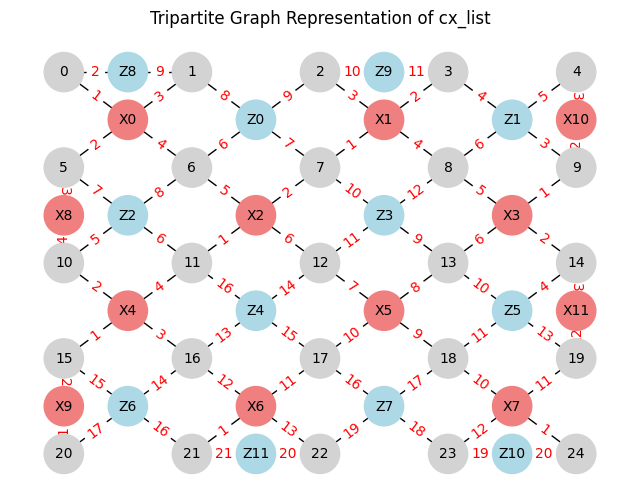

In [15]:
draw_ordered_tanner_graph.draw_cx_list(optimizer.best_cx_list, optimizer.ancilla_type, data_coords=code.data_coords, ancilla_coords=code.ancilla_coords)

In [48]:
len(optimizer.optimizer_history)

91